***
<div style="text-align:center">
     <h1 align="center">
         <i class="fas fa-calendar-day" aria-hidden="true">  Day 30 of #66daysofdata_NLP </i>
    </h1>      
</div>

<h2 style='text-align: center;'>
    <mark>Transformers</mark>
</h2>

<h3 style='text-align: center;'>
    🤗 Hugging Face
</h3>


* ref: 
    - [https://huggingface.co](https://huggingface.co/docs/transformers/master/en/index)


`Hugging Face` has released many open-source libraries for NLP-based tokenizers and converters since its inception.
Pre-trained models from one of their libraries are extremely beneficial for a number of natural language processing (NLP) jobs.

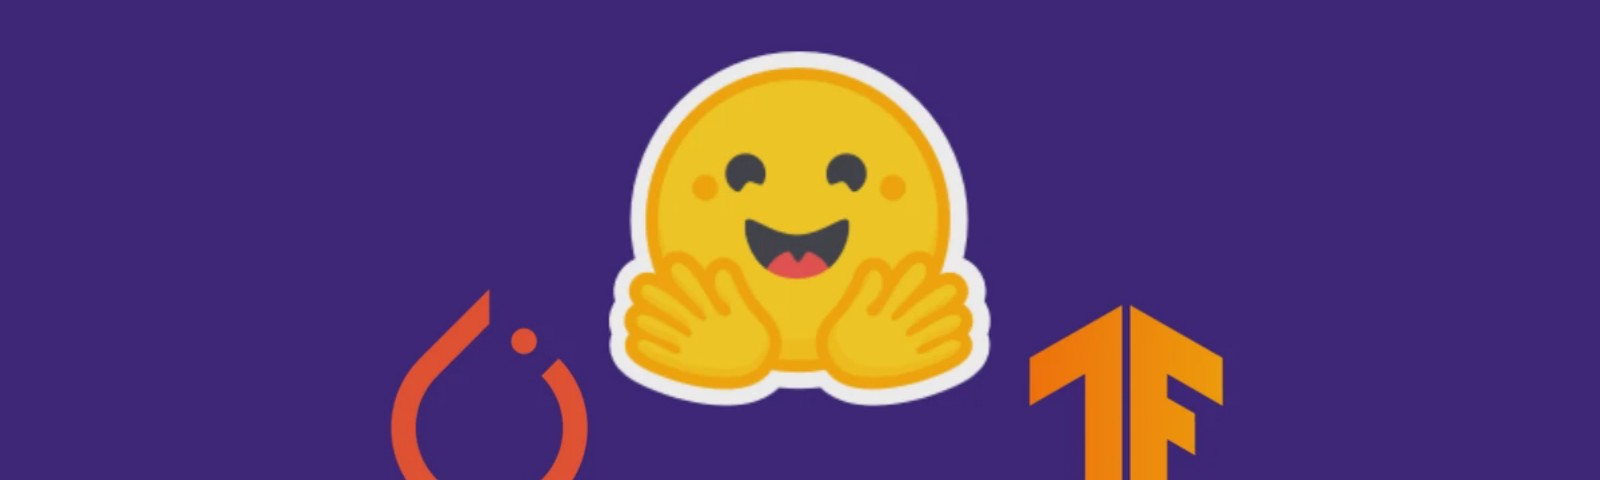

It was intended to allow general-purpose architectures like:

 - BERT
 - GPT-2
 - XLNet
 - XLM
 - DistilBERT
 - RoBERTa 
 
 for Natural Language Understanding (NLU) and Natural Language Generation (NLG) it can execute tasks like:
 - Text categorization
 - Information extraction
 - Text synthesis 
 
In addition to categorization, this library does 
- Information extraction, 
- Question answering, 
- Summarization, 
- Translation, 
- Text production 
in over 100 languages. 
    



***
# 🤗 Transformers provides the following tasks out of the box:

- `Sentiment analysis`: is a text positive or negative?
- `Text generation` (in English): provide a prompt and the model will generate what follows.
- `Name entity recognition (NER)`: in an input sentence, label each word with the entity it represents (person, place, etc.)
- `Question answering`: provide the model with some context and a question, extract the answer from the context.
- `Filling masked text`: given a text with masked words (e.g., replaced by [MASK]), fill the blanks.
- `Summarization`: generate a summary of a long text.
- `Translation`: translate a text in another language.
- `Feature extraction`: return a tensor representation of the text.


### Install required libraries

In [1]:
# Installing previous versions of PyTorch 
# CUDA 10.1
#!conda install pytorch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 cudatoolkit=10.1 -c pytorch -y

# Install tensorflow-gpu (here for cuda 10.1)
#!pip3 install tensorflow-gpu==2.1.0

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
import tensorflow as tf;
print(f"tf version: {tf.__version__}")
#tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')

tf version: 2.1.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!pip install transformers

## To check 🤗 Transformers is properly installed, run the following command:

In [5]:
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"

2021-12-07 09:29:58.753773: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2021-12-07 09:29:58.754752: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
[{'label': 'POSITIVE', 'score': 0.9998704195022583}]


# Summary of the tasks

1. Sequence Classification 

In order to do an inference on a task, several mechanisms are made available by the library:

- `Pipelines`: very easy-to-use abstractions, which require as little as two lines of code.
- `Direct model use`: Less abstractions, but more flexibility and power via a direct access to a tokenizer (PyTorch/TensorFlow) and full inference capacity.

***
## Task 1: Sequence Classification  

The task of `categorizing sequences` according to a `set of classifications` is known as `sequence classification`.

The `GLUE dataset`, which is fully dependent on sequence classification, provides one example. 

Here's an example of how `sentiment analysis` may be done using `pipelines`: 

    - determining if a sequence is positive or negative.
    
It makes use of a fine-tuned model on sst2, a GLUE job.

This returns a score and a label ("POSITIVE" or "NEGATIVE"), as follows: 

In [6]:
from transformers import pipeline

print("\n\n'Sentiment-Analysis with transformers pipeline'\n")

classifier = pipeline("sentiment-analysis")

neg_sen = "I hate you"
result = classifier(neg_sen)[0]
print(f"'{neg_sen}' -> label: {result['label']}, with score: {round(result['score'], 4)}")

pos_sen = "I love you"
result = classifier(pos_sen)[0]
print(f"'{pos_sen}' -> label: {result['label']}, with score: {round(result['score'], 4)}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)




'Sentiment-Analysis with transformers pipeline'

'I hate you' -> label: NEGATIVE, with score: 0.9991
'I love you' -> label: POSITIVE, with score: 0.9999


### Sequence classification (paraphrases detection)

In [7]:
# load libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

* prepare the example sequences and classes

In [8]:
classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

* Step 1: 

    - Instantiate a tokenizer and a model from the checkpoint name. 
    - The model is identified as a BERT model and loads it with the weights stored in the checkpoint.

In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

***
* Step 2:

    
    - Build a sequence from the two sentences, with the correct model-specific separators, 
    - token type ids and attention masks (which will be created automatically by the tokenizer).

In [10]:
# The tokenizer will automatically add any model specific separators (i.e. <CLS> and <SEP>) and tokens to
# the sequence, as well as compute the attention masks.
paraphrase     = tokenizer(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt")

print(f"Two paraphrase candidate sequences are:\n- '{sequence_0}'\n- '{sequence_2}'\n")
print(f"The input_ids are:\n{paraphrase['input_ids']}\n\nThe token_type_ids:\n{paraphrase['token_type_ids']}")

Two paraphrase candidate sequences are:
- 'The company HuggingFace is based in New York City'
- 'HuggingFace's headquarters are situated in Manhattan'

The input_ids are:
tensor([[  101,  1109,  1419, 20164, 10932,  2271,  7954,  1110,  1359,  1107,
          1203,  1365,  1392,   102, 20164, 10932,  2271,  7954,   112,   188,
          3834,  1132,  3629,  1107,  6545,   102]])

The token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1]])


* The `attention mask` is a binary tensor indicating the position of the padded indices so that the model does not attend to them. 

* For the BertTokenizer, `1` indicates a value that `should be attended` to, while `0` indicates a `padded value`.

***
* Step 3:

    - Pass this sequence through the `model` so that it is classified in one of the two available 
    - classes: 0 (not a paraphrase) and 1 (is a paraphrase).

In [11]:
paraphrase_classification_logits     = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits
print(f"The paraphrase classification logits:\n  {paraphrase_classification_logits}\n\nThe not_paraphrase_classification_logits:\n  {not_paraphrase_classification_logits}")

The paraphrase classification logits:
  tensor([[-0.3495,  1.9004]], grad_fn=<AddmmBackward>)

The not_paraphrase_classification_logits:
  tensor([[ 0.5386, -2.2197]], grad_fn=<AddmmBackward>)


***
* Step 4:

    - Compute the softmax of the result to get probabilities over the classes.
    - Print the results.

In [12]:
paraphrase_results     = torch.softmax(paraphrase_classification_logits,     dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

# Should be paraphrase
print(f"Paraphrase sequences:\n\n- '{sequence_0}'\n- '{sequence_2}'\n\nResults:\n")
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")
print('------------------------------------------------')

# Should not be paraphrase
print(f"\nNot paraphrase sequences:\n\n- '{sequence_0}'\n- '{sequence_1}'\n\nResults:\n")
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")

Paraphrase sequences:

- 'The company HuggingFace is based in New York City'
- 'HuggingFace's headquarters are situated in Manhattan'

Results:

not paraphrase: 10%
is paraphrase: 90%
------------------------------------------------

Not paraphrase sequences:

- 'The company HuggingFace is based in New York City'
- 'Apples are especially bad for your health'

Results:

not paraphrase: 94%
is paraphrase: 6%


***
<div style="text-align:center">
     <h1 align="center">
         <i class="fas fa-calendar-day" aria-hidden="true">  Day 31 of #66daysofdata_NLP </i>
    </h1>      
</div>

<h2 style='text-align: center;'>
    <mark>Transformers</mark>
</h2>

<h3 style='text-align: center;'>
    🤗 Hugging Face
</h3>

***
## Task 1: Extractive Question Answering 

Extractive Question Answering (QA) is the undertaking of extracting an answer from a text given a question.

An instance of a question answering dataset is the `SQuAD dataset`, that's entirely based on that task.


In [14]:
from transformers import pipeline

question_answerer = pipeline("question-answering")

context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
"""

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [57]:
print("\n***Extractive Question Answering with: transformers.pipeline('question-answering')***\n")

print(f"Context:\n{context}")
question_1="What is extractive question answering?"
result = question_answerer(question=question_1, context=context)
print(f"Q:      '{question_1}'")
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

question_2="What is a good example of a question answering dataset?"
result = question_answerer(question=question_2, context=context)
print(f"\nQ:      '{question_2}'")
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")



***Extractive Question Answering with: transformers.pipeline('question-answering')***

Context:

Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.

Q:      'What is extractive question answering?'
Answer: 'the task of extracting an answer from a text given a question', score: 0.6177, start: 34, end: 95

Q:      'What is a good example of a question answering dataset?'
Answer: 'SQuAD dataset', score: 0.5152, start: 147, end: 160


In [33]:
# load libraries
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

* Step 1: 

    - Instantiate a tokenizer and a model from the checkpoint name. 
    - The model is identified as a BERT model and loads it with the weights stored in the checkpoint.

In [34]:
tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")
model     = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

* Step 2: 

    - Define a text and a few questions.

In [35]:
text = r"""
🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.
"""

questions = [
    "How many pretrained models are available in 🤗 Transformers?",
    "What does 🤗 Transformers provide?",
    "🤗 Transformers provides interoperability between which frameworks?",
]

* Step 3: 

- Iterate over the questions and build a sequence from the text and the current question, with the correct model-specific separators token type ids and attention masks.
- Pass this sequence through the model. This outputs a range of scores across the entire sequence tokens (question and text), for both the start and end positions.

In [52]:
question = questions[0]
inputs    = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")

print(f"Q : {question}\n")
for key in inputs.keys():
    print(f"{key}:\n{inputs[key]}\n")

Q : How many pretrained models are available in 🤗 Transformers?

input_ids:
tensor([[  101,  2129,  2116,  3653, 23654,  2098,  4275,  2024,  2800,  1999,
           100, 19081,  1029,   102,   100, 19081,  1006,  3839,  2124,  2004,
          1052, 22123,  2953,  2818,  1011, 19081,  1998,  1052, 22123,  2953,
          2818,  1011,  3653, 23654,  2098,  1011, 14324,  1007,  3640,  2236,
          1011,  3800,  4294,  2015,  1006, 14324,  1010, 14246,  2102,  1011,
          1016,  1010, 23455,  1010, 28712,  2213,  1010,  4487, 16643, 23373,
          1010, 28712,  7159,  1529,  1007,  2005,  3019,  2653,  4824,  1006,
         17953,  2226,  1007,  1998,  3019,  2653,  4245,  1006, 17953,  2290,
          1007,  2007,  2058,  3590,  1009,  3653, 23654,  2098,  4275,  1999,
          2531,  1009,  4155,  1998,  2784,  6970, 25918,  8010,  2090, 23435,
         12314,  1016,  1012,  1014,  1998,  1052, 22123,  2953,  2818,  1012,
           102]])

token_type_ids:
tensor([[0, 0, 0, 0,

- `token_type_ids`: they indicate to the model which part of the inputs correspond to the first sentence (`question`) and which part corresponds to the second sentence (`texttokens`).
- `attention_mask`: it points out which tokens the model should pay attention to and which ones it should not (because they represent padding in this case).


In [55]:
print(f"Text:\n{text}\n\n")
for question in questions:
    inputs    = tokenizer(question, text, add_special_tokens=True, return_tensors="pt")
    input_ids = inputs["input_ids"].tolist()[0]
    

    outputs             = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores   = outputs.end_logits

    # Get the most likely beginning of answer with the argmax of the score
    answer_start = torch.argmax(answer_start_scores)
    # Get the most likely end of answer with the argmax of the score 
    answer_end   = torch.argmax(answer_end_scores) + 1

    answer       = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end]))

    print(f"Question: {question}")
    print(f"Answer:   {answer}\n")

Text:

🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides general-purpose
architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for Natural Language Understanding (NLU) and Natural
Language Generation (NLG) with over 32+ pretrained models in 100+ languages and deep interoperability between
TensorFlow 2.0 and PyTorch.



Question: How many pretrained models are available in 🤗 Transformers?
Answer:   over 32 +

Question: What does 🤗 Transformers provide?
Answer:   general - purpose architectures

Question: 🤗 Transformers provides interoperability between which frameworks?
Answer:   tensorflow 2. 0 and pytorch

